**The Battle of Neighborhood:
Customers satisfaction evaluation for Starbucks shops in Manhattan by scores in Foursquare**

# Install and Load Library

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab\n",
#import folium # map rendering library\n",

print('Libraries imported.')

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

# Data Prepare
## Venues in New York Neighborhoods

In [3]:
#get neighborhoods
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods_data = newyork_data['features']

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

Data downloaded!


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [6]:
#getNearbyVenues from the course
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue ID', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [7]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3203, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,4b4429abf964a52037f225e3,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,4baf59e8f964a520a6f93be3,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,4b79cc46f964a520c5122fe3,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',4b5357adf964a520319827e3,40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop


## Extract selected Venues information (Coffee)

In [8]:
manhattan_venues_selected=manhattan_venues[manhattan_venues['Venue Category'].str.contains("Coffee")]

print(len(manhattan_venues_selected))
manhattan_venues_selected.head()

143


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
4,Marble Hill,40.876551,-73.910660,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop
8,Marble Hill,40.876551,-73.910660,Starbucks,57655be738faa66160da7527,40.873755,-73.908613,Coffee Shop
71,Chinatown,40.715618,-73.994279,Little Canal,579f74eb498e9a4d6caabeda,40.714317,-73.990361,Coffee Shop
103,Chinatown,40.715618,-73.994279,Cafe Grumpy,4df7603c7d8b5f396ac5cfd5,40.715069,-73.989952,Coffee Shop
130,Washington Heights,40.851903,-73.936900,Forever Coffee Bar,5bafd8419de23b002c772a72,40.850433,-73.936607,Coffee Shop


In [10]:
#manhattan_venues_selected["Venue"].value_counts()

In [11]:
#Test to get needed information for one venue

#venue_id="55f81cd2498ee903149fcc64"
#url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
#result = requests.get(url).json()
#print(result)


In [12]:
#get needed information for all venues
def getVenuesInfo(venue_ids):
    
    venuesInfo=pd.DataFrame()
    for venue_id in venue_ids:
        print(venue_id)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

            
        # make the GET request
        result = requests.get(url).json()
        #print(result)
        
        d = {
            'Venue ID':[venue_id],
            'rating':[result.get('response', {}).get('venue', {}).get('rating', "NA")],
            'tier':[result.get('response', {}).get('venue', {}).get('price', {}).get('tier', "NA")],
            'message':[result.get('response', {}).get('venue', {}).get('price', {}).get('message', "NA")],
            'LikeCount':[result.get('response', {}).get('venue', {}).get('likes', {}).get('count', "NA")],
            'ratingSignals':[result.get('response', {}).get('venue', {}).get('ratingSignals', "NA")],
            'TipCount':[result.get('response', {}).get('venue', {}).get('tips', {}).get('count', "NA")],
        }
        d = pd.DataFrame(d)
        venuesInfo=venuesInfo.append(d)
    return(venuesInfo)


manhattan_venues_info = getVenuesInfo(venue_ids=manhattan_venues_selected['Venue ID'])

55f81cd2498ee903149fcc64
57655be738faa66160da7527
579f74eb498e9a4d6caabeda
4df7603c7d8b5f396ac5cfd5
5bafd8419de23b002c772a72
4aafdf93f964a520f66420e3
5c092ec2d1a402002cd083cb
55aa54bc498eac980f832bc9
57e584ed498eddfb8e1971a9
537f7140498e15919e85ff84
5b3cb1e828374e003971f2b1
5b0345aa9ba3e5002c6bfeb8
5c58826ad1a402002c0b8793
4fef2f45e4b0562c835d6b7c
5db09b8c89e5a10008ed9f2e
58232a8d8b624d27650026e8
4ef4c5b099111bd0a9b8e9c2
5c01826e60d11b002c912004
57eeb8e3498e1dd086ebf03f
5dbf3656eb5a0d000859a595
59b6f86861f0700444627663
5b0edcd498fbfc002cfcad0e
5145d153e4b0887518ec0317
58b2f2f60037eb7f1a778535
4a819c70f964a52006f71fe3
4b69efa9f964a52014bd2be3
4da39a219935a0933d0bcd6f
4b96c4b5f964a5204ce334e3
4a4281c6f964a520e9a51fe3
4e9078d6b63456ab9570ec12
5720f9bfcd10e6f14ea7317f
4ef4c5b099111bd0a9b8e9c2
4b0807abf964a520890223e3
4a773e0df964a520f1e31fe3
589634906c682b1f845ae6dc
4fc64ab9e4b0acb95c508a5f
544e883b498e01e80f241740
4abb899bf964a520f18320e3
5c683caaf96b2c00397a8609
526d9114498ec8efda93fcce


In [13]:
print(len(manhattan_venues_info))
manhattan_venues_info.head()

143


,Venue ID,rating,tier,message,LikeCount,ratingSignals,TipCount
0,55f81cd2498ee903149fcc64,8,1,Cheap,24,29,2
0,57655be738faa66160da7527,7.2,1,Cheap,7,8,0
0,579f74eb498e9a4d6caabeda,9.1,1,Cheap,208,258,41
0,4df7603c7d8b5f396ac5cfd5,8.5,1,Cheap,218,291,52
0,5bafd8419de23b002c772a72,7.9,1,Cheap,12,17,5


In [14]:
print(len(manhattan_venues_selected))
manhattan_venues_selected.head()

143


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
4,Marble Hill,40.876551,-73.910660,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop
8,Marble Hill,40.876551,-73.910660,Starbucks,57655be738faa66160da7527,40.873755,-73.908613,Coffee Shop
71,Chinatown,40.715618,-73.994279,Little Canal,579f74eb498e9a4d6caabeda,40.714317,-73.990361,Coffee Shop
103,Chinatown,40.715618,-73.994279,Cafe Grumpy,4df7603c7d8b5f396ac5cfd5,40.715069,-73.989952,Coffee Shop
130,Washington Heights,40.851903,-73.936900,Forever Coffee Bar,5bafd8419de23b002c772a72,40.850433,-73.936607,Coffee Shop


In [57]:
#merge all inforamtion together
#manhattan_venues_selected
data1=manhattan_venues_selected.reset_index(drop=True)
data1.head()
data2=manhattan_venues_info.reset_index(drop=True)
data2.head()
data2 = data2.drop(['Venue ID'], axis=1)
d = pd.concat([data1,data2], axis=1)

print(d.shape)
d=d.drop_duplicates()
print(d.shape)

(143, 14)
(143, 14)


In [58]:
d.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,rating,tier,message,LikeCount,ratingSignals,TipCount
0,Marble Hill,40.876551,-73.910660,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop,8,1,Cheap,24,29,2
1,Marble Hill,40.876551,-73.910660,Starbucks,57655be738faa66160da7527,40.873755,-73.908613,Coffee Shop,7.2,1,Cheap,7,8,0
2,Chinatown,40.715618,-73.994279,Little Canal,579f74eb498e9a4d6caabeda,40.714317,-73.990361,Coffee Shop,9.1,1,Cheap,208,258,41
3,Chinatown,40.715618,-73.994279,Cafe Grumpy,4df7603c7d8b5f396ac5cfd5,40.715069,-73.989952,Coffee Shop,8.5,1,Cheap,218,291,52
4,Washington Heights,40.851903,-73.936900,Forever Coffee Bar,5bafd8419de23b002c772a72,40.850433,-73.936607,Coffee Shop,7.9,1,Cheap,12,17,5


In [59]:
d.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue ID                   object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
rating                     object
tier                        int64
message                    object
LikeCount                   int64
ratingSignals              object
TipCount                    int64
dtype: object

In [79]:
d=d.set_index("Venue ID")

In [60]:
#change data type
#d['rating'] = d['rating'].replace('None',None )
d['rating'] = d['rating'].replace('NA',None )

d['rating']=d['rating'].astype("float")

d['ratingSignals'] = d['ratingSignals'].replace('NA',None )     
d['ratingSignals']=d['ratingSignals'].astype("int64")

d.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue ID                   object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
rating                    float64
tier                        int64
message                    object
LikeCount                   int64
ratingSignals               int64
TipCount                    int64
dtype: object

In [61]:
#Other data cleaning
d["TipCountLog"]=np.log1p(d["TipCount"])
d["ratingSignalsLog"]=np.log1p(d["ratingSignals"])
d["LikeCountLog"]=np.log1p(d["LikeCount"])

d["StarbuckYN"]="Not Starbucks"
d["StarbuckYN"].loc[d["Venue"].str.contains("Starbuck")]="Starbucks"

d.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,rating,tier,message,LikeCount,ratingSignals,TipCount,TipCountLog,ratingSignalsLog,LikeCountLog,StarbuckYN
0,Marble Hill,40.876551,-73.910660,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop,8.0,1,Cheap,24,29,2,1.098612,3.401197,3.218876,Starbucks
1,Marble Hill,40.876551,-73.910660,Starbucks,57655be738faa66160da7527,40.873755,-73.908613,Coffee Shop,7.2,1,Cheap,7,8,0,0.000000,2.197225,2.079442,Starbucks
2,Chinatown,40.715618,-73.994279,Little Canal,579f74eb498e9a4d6caabeda,40.714317,-73.990361,Coffee Shop,9.1,1,Cheap,208,258,41,3.737670,5.556828,5.342334,Not Starbucks
3,Chinatown,40.715618,-73.994279,Cafe Grumpy,4df7603c7d8b5f396ac5cfd5,40.715069,-73.989952,Coffee Shop,8.5,1,Cheap,218,291,52,3.970292,5.676754,5.389072,Not Starbucks
4,Washington Heights,40.851903,-73.936900,Forever Coffee Bar,5bafd8419de23b002c772a72,40.850433,-73.936607,Coffee Shop,7.9,1,Cheap,12,17,5,1.791759,2.890372,2.564949,Not Starbucks


# Overall Data Distribution and Visulization

In [21]:
import seaborn as sns
!pip install tableone
from tableone import TableOne


In [62]:
d[["rating","tier","LikeCount","ratingSignals","TipCount"]].describe()

,rating,tier,LikeCount,ratingSignals,TipCount
count,143.000000,143.000000,143.00000,143.000000,143.000000
mean,8.255245,1.125874,215.58042,289.825175,59.846154
std,0.641596,0.353397,319.30716,415.178891,92.127538
min,5.400000,1.000000,0.00000,0.000000,0.000000
25%,7.800000,1.000000,34.00000,48.000000,9.000000
50%,8.400000,1.000000,115.00000,170.000000,26.000000
75%,8.700000,1.000000,262.00000,351.500000,77.000000
max,9.300000,3.000000,2439.00000,3123.000000,687.000000


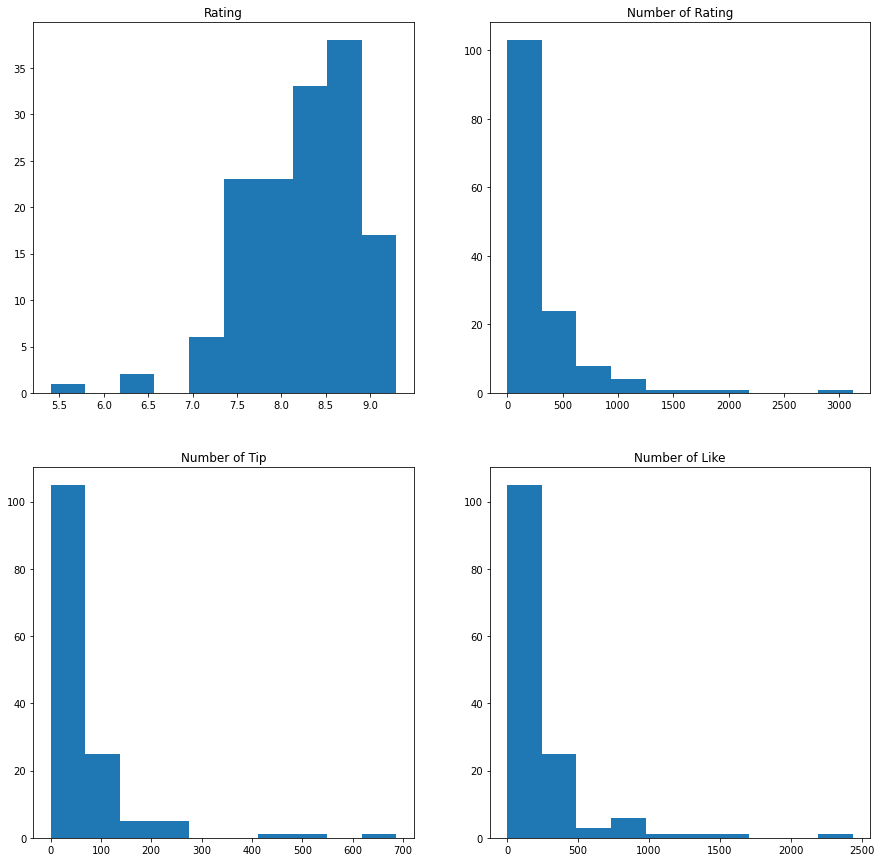

In [130]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
axs[0,0].hist(d["rating"])
axs[0,0].set_title('Rating')
axs[0,1].hist(d["ratingSignals"])
axs[0,1].set_title('Number of Rating')
axs[1,0].hist(d["TipCount"])
axs[1,0].set_title('Number of Tip')
axs[1,1].hist(d["LikeCount"])
axs[1,1].set_title('Number of Like')
plt.show()

In [63]:
#d.groupby('Venue')['Venue ID'].nunique().sort_values(ascending=False).head()
#d.head()["Venue"].unique()
d["Venue"].value_counts().head()

Starbucks                    15
Blue Bottle Coffee            9
La Colombe Torrefaction       5
Oslo Coffee Roasters          4
Laughing Man Coffee & Tea     3
Name: Venue, dtype: int64

In [64]:
#d.groupby('StarbuckYN')['Venue ID'].nunique().sort_values(ascending=False)
d["StarbuckYN"].value_counts()

Not Starbucks    125
Starbucks         18
Name: StarbuckYN, dtype: int64

In [65]:
#d["message"].value_counts()
d.groupby(["StarbuckYN", "message"]).size()

StarbuckYN     message  
Not Starbucks  Cheap        109
               Expensive      1
               Moderate      15
Starbucks      Cheap         17
               Moderate       1
dtype: int64

In [124]:
print(d["Neighborhood"].nunique())
d["Neighborhood"].value_counts().head()

39


Financial District    10
Chelsea                9
Carnegie Hill          8
Upper East Side        6
Soho                   6
Name: Neighborhood, dtype: int64

Text(0.5, 1.0, 'Number of coffee shops in each neighborhood')

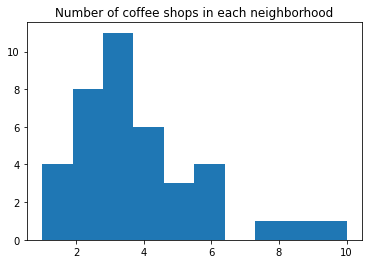

In [128]:
plt.hist(d["Neighborhood"].value_counts())
plt.title('Number of coffee shops in each neighborhood')

In [129]:
dNeighborhoodScoreMean=d[["Neighborhood",'rating','ratingSignals','TipCount','LikeCount']].groupby(["Neighborhood"]).mean()
#dNeighborhoodScoreMean.head()
dNeighborhoodScoreMean.describe()

,rating,ratingSignals,TipCount,LikeCount
count,39.000000,39.000000,39.000000,39.000000
mean,8.180185,272.015028,56.076211,198.781838
std,0.507168,227.652996,50.576190,180.007191
min,6.500000,15.000000,1.000000,1.000000
25%,7.890000,131.000000,25.500000,76.625000
50%,8.150000,203.250000,35.500000,155.250000
75%,8.565000,346.375000,70.333333,261.375000
max,9.050000,1172.666667,263.333333,913.000000


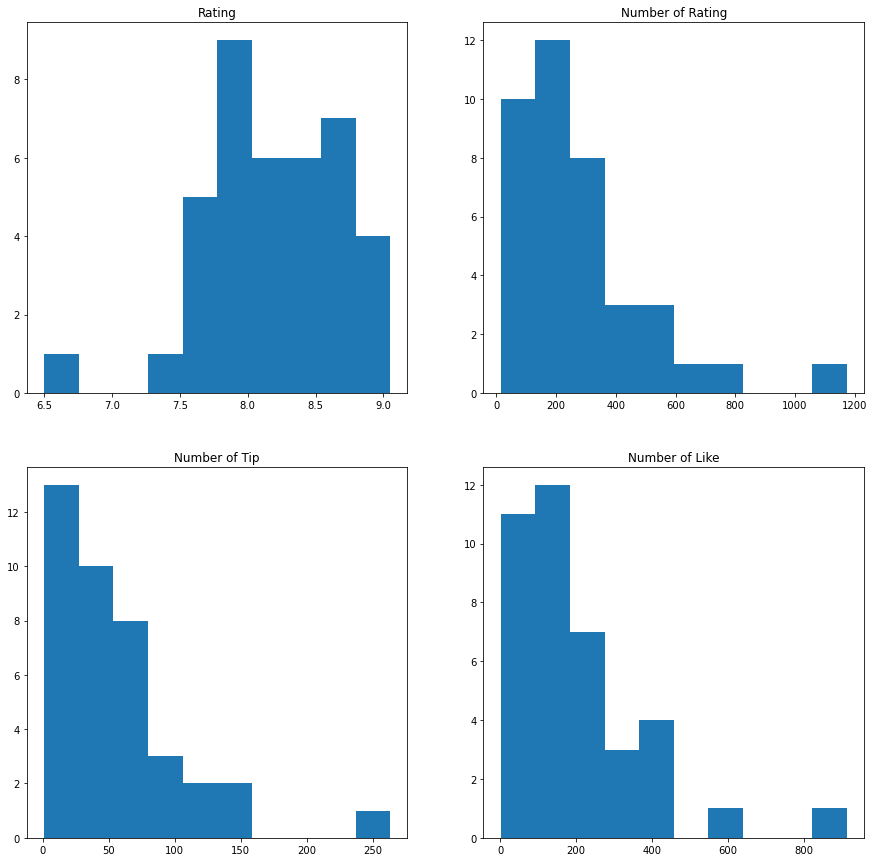

In [69]:
#plt.hist(dNeighborhoodScoreMean["ratingSignals"])
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
axs[0,0].hist(dNeighborhoodScoreMean["rating"])
axs[0,0].set_title('Rating')
axs[0,1].hist(dNeighborhoodScoreMean["ratingSignals"])
axs[0,1].set_title('Number of Rating')
axs[1,0].hist(dNeighborhoodScoreMean["TipCount"])
axs[1,0].set_title('Number of Tip')
axs[1,1].hist(dNeighborhoodScoreMean["LikeCount"])
axs[1,1].set_title('Number of Like')
plt.show()



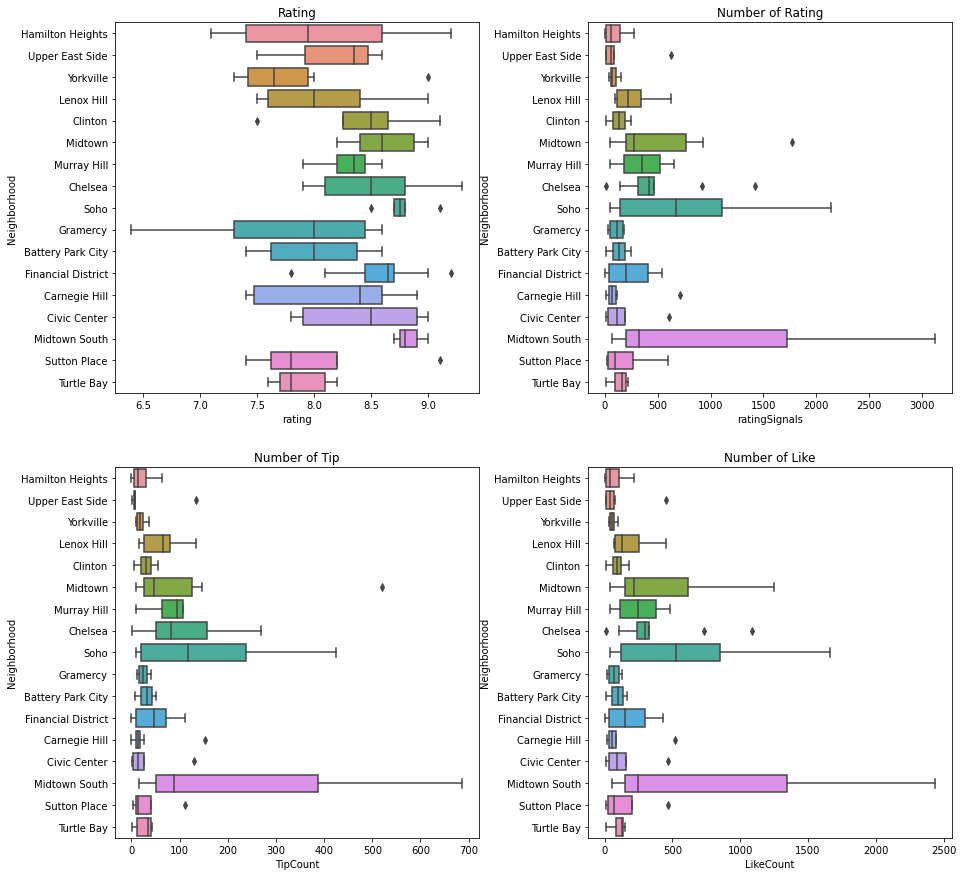

In [70]:
#Only focus on neibohorhood with at lease 4 shops for boxplot
temp=d["Neighborhood"].value_counts()
interesetedNeighborhood=temp[temp>=4].index
dForBoxploot=d[d["Neighborhood"].str.contains('|'.join(interesetedNeighborhood))]


fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
#plt.figure(figsize=(15,15))
sns.boxplot(x='rating', y='Neighborhood', data=dForBoxploot,ax=axs[0,0])
axs[0,0].set_title('Rating')
sns.boxplot(x='ratingSignals', y='Neighborhood', data=dForBoxploot,ax=axs[0,1])
axs[0,1].set_title('Number of Rating')
sns.boxplot(x='TipCount', y='Neighborhood', data=dForBoxploot,ax=axs[1,0])
axs[1,0].set_title('Number of Tip')
sns.boxplot(x='LikeCount', y='Neighborhood', data=dForBoxploot,ax=axs[1,1])
axs[1,1].set_title('Number of Like')

plt.subplots_adjust(wspace=0.3)
plt.show()


# Overall comprasion of Starbucks vs other coffee shops

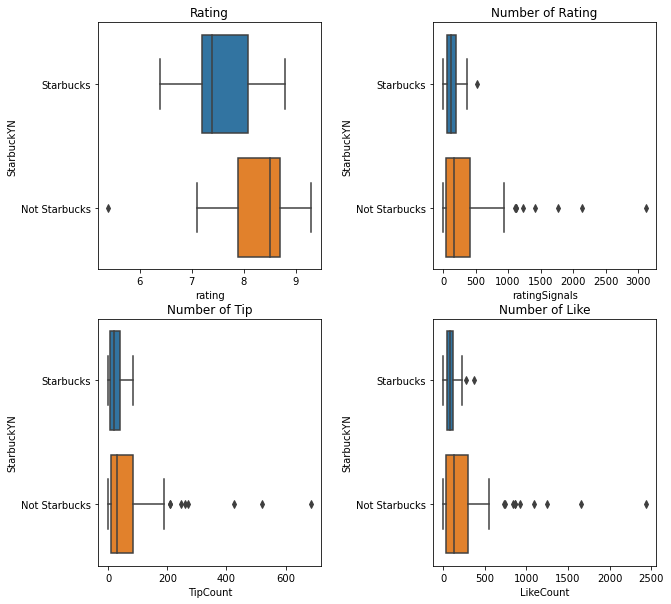

In [71]:

fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.boxplot(x='rating', y='StarbuckYN', data=d,ax=axs[0,0])
axs[0,0].set_title('Rating')
sns.boxplot(x='ratingSignals', y='StarbuckYN', data=d,ax=axs[0,1])
axs[0,1].set_title('Number of Rating')
sns.boxplot(x='TipCount', y='StarbuckYN', data=d,ax=axs[1,0])
axs[1,0].set_title('Number of Tip')
sns.boxplot(x='LikeCount', y='StarbuckYN', data=d,ax=axs[1,1])
axs[1,1].set_title('Number of Like')
plt.subplots_adjust(wspace=0.5)
plt.show()


<Figure size 1080x1080 with 0 Axes>

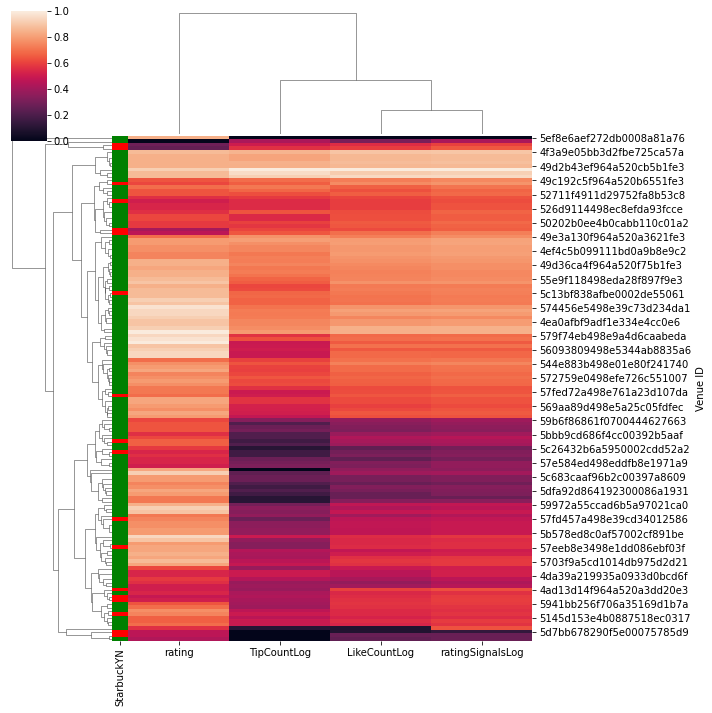

In [93]:
plt.figure(figsize=(15,15))

dForHeatmap=d[['rating','LikeCountLog','ratingSignalsLog','TipCountLog']]

dAnnotation = d["StarbuckYN"]

#dAnnotation = d["Venue"]
lut = dict(zip(dAnnotation.unique(), "rgb"))
#print(lut)
row_colors = dAnnotation.map(lut)
#dForHeatmap=dForHeatmap.reset_index(drop=True)
#dForHeatmap.head()
sns.clustermap(dForHeatmap,standard_scale=1,row_colors=row_colors)

In [73]:
#table 1
columns=["rating","TipCountLog","ratingSignalsLog","LikeCountLog","message"]
categorical=["message"]
#mytable = TableOne(d, columns=columns, categorical=categorical, groupby="StarbuckYN", nonnormal=nonnormal, rename=labels, pval=False)
mytable = TableOne(d, columns=columns, categorical=categorical,groupby="StarbuckYN", pval=True)
print(mytable.tabulate(tablefmt = "fancy_grid"))


╒═════════════════════════════╤═══════════╤═══════════╤════════════╤═════════════════╤═════════════╤═══════════╕
│                             │           │ Missing   │ Overall    │ Not Starbucks   │ Starbucks   │ P-Value   │
╞═════════════════════════════╪═══════════╪═══════════╪════════════╪═════════════════╪═════════════╪═══════════╡
│ n                           │           │           │ 143        │ 125             │ 18          │           │
├─────────────────────────────┼───────────┼───────────┼────────────┼─────────────────┼─────────────┼───────────┤
│ rating, mean (SD)           │           │ 0         │ 8.3 (0.6)  │ 8.4 (0.6)       │ 7.6 (0.7)   │ <0.001    │
├─────────────────────────────┼───────────┼───────────┼────────────┼─────────────────┼─────────────┼───────────┤
│ TipCountLog, mean (SD)      │           │ 0         │ 3.3 (1.4)  │ 3.3 (1.4)       │ 2.7 (1.4)   │ 0.078     │
├─────────────────────────────┼───────────┼───────────┼────────────┼─────────────────┼──────────

In [76]:
d.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,rating,tier,message,LikeCount,ratingSignals,TipCount,TipCountLog,ratingSignalsLog,LikeCountLog,StarbuckYN
0,Marble Hill,40.876551,-73.910660,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop,8.0,1,Cheap,24,29,2,1.098612,3.401197,3.218876,Starbucks
1,Marble Hill,40.876551,-73.910660,Starbucks,57655be738faa66160da7527,40.873755,-73.908613,Coffee Shop,7.2,1,Cheap,7,8,0,0.000000,2.197225,2.079442,Starbucks
2,Chinatown,40.715618,-73.994279,Little Canal,579f74eb498e9a4d6caabeda,40.714317,-73.990361,Coffee Shop,9.1,1,Cheap,208,258,41,3.737670,5.556828,5.342334,Not Starbucks
3,Chinatown,40.715618,-73.994279,Cafe Grumpy,4df7603c7d8b5f396ac5cfd5,40.715069,-73.989952,Coffee Shop,8.5,1,Cheap,218,291,52,3.970292,5.676754,5.389072,Not Starbucks
4,Washington Heights,40.851903,-73.936900,Forever Coffee Bar,5bafd8419de23b002c772a72,40.850433,-73.936607,Coffee Shop,7.9,1,Cheap,12,17,5,1.791759,2.890372,2.564949,Not Starbucks


# Compare with other coffee shops in the same Neighborhood and across the city one by one

In [98]:
from scipy import stats

In [74]:
d.head().index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [99]:
#get needed information for all venues
def compareVenuesInfo(venue_ids,d):
    
    venuesInfo=pd.DataFrame()
    for venueId in venue_ids:
        print(venueId)
        
        vLat=d.loc[venueId]["Venue Latitude"]
        vLong=d.loc[venueId]["Venue Longitude"]
        vNeighborhood=d.loc[venueId]["Neighborhood"]
        
        dOtherStores=d.loc[~d.index.isin([venueId])]
        dOtherStores["Distance"]=(dOtherStores["Venue Latitude"]-vLat)**2+(dOtherStores["Venue Longitude"]-vLong)**2
        dOtherStoresNearest=dOtherStores.sort_values(by=['Distance']).head(5)
        dOtherStoresNeighborhood=dOtherStores[dOtherStores["Neighborhood"]==vNeighborhood]
#        print(dOtherStoresNeighborhood)

        scoreVar="rating"
        vScore=d.loc[venueId][scoreVar]
        #dOtherStoresNearest
        scoreAllOther1=dOtherStoresNeighborhood[scoreVar].mean()
        pAllOther1=stats.ttest_1samp(dOtherStoresNeighborhood[scoreVar],vScore)[1]
        scoreNear1=dOtherStoresNearest[scoreVar].mean()
        pNear1=stats.ttest_1samp(dOtherStoresNearest[scoreVar],vScore)[1]

        scoreVar="ratingSignalsLog"
        vScore=d.loc[venueId][scoreVar]
        #dOtherStoresNearest
        scoreAllOther2=dOtherStoresNeighborhood[scoreVar].mean()
        pAllOther2=stats.ttest_1samp(dOtherStoresNeighborhood[scoreVar],vScore)[1]
        scoreNear2=dOtherStoresNearest[scoreVar].mean()
        pNear2=stats.ttest_1samp(dOtherStoresNearest[scoreVar],vScore)[1]        
        
        scoreVar="LikeCountLog"
        vScore=d.loc[venueId][scoreVar]
        #dOtherStoresNearest
        scoreAllOther3=dOtherStoresNeighborhood[scoreVar].mean()
        pAllOther3=stats.ttest_1samp(dOtherStoresNeighborhood[scoreVar],vScore)[1]
        scoreNear3=dOtherStoresNearest[scoreVar].mean()
        pNear3=stats.ttest_1samp(dOtherStoresNearest[scoreVar],vScore)[1]     

        scoreVar="TipCountLog"
        vScore=d.loc[venueId][scoreVar]
        #dOtherStoresNearest
        scoreAllOther4=dOtherStoresNeighborhood[scoreVar].mean()
        pAllOther4=stats.ttest_1samp(dOtherStoresNeighborhood[scoreVar],vScore)[1]
        scoreNear4=dOtherStoresNearest[scoreVar].mean()
        pNear4=stats.ttest_1samp(dOtherStoresNearest[scoreVar],vScore)[1]     
        
        temp = {
            'Venue ID':[venueId],
            'Rating Neighborhood':[scoreAllOther1],
            'Rating Neighborhood P':[pAllOther1],
            'Rating Near':[scoreNear1],
            'Rating Near P':[pNear1],
            'Number of Rating Neighborhood':[scoreAllOther2],
            'Number of Rating Neighborhood P':[pAllOther2],
            'Number of Rating Near':[scoreNear2],
            'Number of Rating Near P':[pNear2],
            'Number of Like Neighborhood':[scoreAllOther3],
            'Number of Like Neighborhood P':[pAllOther3],
            'Number of Like Near':[scoreNear3],
            'Number of Like Near P':[pNear3],
            'Number of Tip Neighborhood':[scoreAllOther4],
            'Number of Tip Neighborhood P':[pAllOther4],
            'Number of Tip Near':[scoreNear4],
            'Number of Tip Near P':[pNear4],
        }
        temp = pd.DataFrame(temp)
        venuesInfo=venuesInfo.append(temp)
    return(venuesInfo)

dStarbucks=d[d["StarbuckYN"]=="Starbucks"]
#dStarbucks.index
dStarbucksComp = compareVenuesInfo(venue_ids=dStarbucks.index,d=d)

55f81cd2498ee903149fcc64
57655be738faa66160da7527
4aafdf93f964a520f66420e3
5c01826e60d11b002c912004
57eeb8e3498e1dd086ebf03f
4a819c70f964a52006f71fe3
4b69efa9f964a52014bd2be3
4b0807abf964a520890223e3
4abb899bf964a520f18320e3
5c13bf838afbe0002de55061
4fdc9a79e4b0735a6deafc25
4a704000f964a52040d71fe3
4ce41f161594236ac316fb49
4a9ff5d9f964a520ba3d20e3
57fd457a498e39cd34012586


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in doub

5330323b498e2836f173cf9e
4ad13d14f964a520a3dd20e3
5d7bb678290f5e00075785d9


In [100]:
dStarbucksComp

,Venue ID,Rating Neighborhood,Rating Neighborhood P,Rating Near,Rating Near P,Number of Rating Neighborhood,Number of Rating Neighborhood P,Number of Rating Near,Number of Rating Near P,Number of Like Neighborhood,Number of Like Neighborhood P,Number of Like Near,Number of Like Near P,Number of Tip Neighborhood,Number of Tip Neighborhood P,Number of Tip Near,Number of Tip Near P
0,55f81cd2498ee903149fcc64,7.200000,NaN,7.68,0.279013,2.197225,NaN,3.551279,0.813406,2.079442,NaN,3.251599,0.955394,0.000000,NaN,2.154235,0.190181
0,57655be738faa66160da7527,8.000000,NaN,7.84,0.049285,3.401197,NaN,3.792074,0.033113,3.218876,NaN,3.479486,0.040717,1.098612,NaN,2.373958,0.009642
0,4aafdf93f964a520f66420e3,7.900000,NaN,8.18,0.015631,2.890372,NaN,3.761345,0.051058,2.564949,NaN,3.457927,0.077626,1.791759,NaN,2.577397,0.036053
0,5c01826e60d11b002c912004,8.320000,0.004162,8.28,0.003272,4.187723,0.092310,4.575012,0.082659,3.934933,0.077814,4.296372,0.072782,2.575162,0.070093,3.115285,0.053230
0,57eeb8e3498e1dd086ebf03f,8.100000,0.060088,8.20,0.268367,3.813362,0.409227,3.874581,0.246659,3.531952,0.354779,3.644366,0.207794,2.355439,0.825441,1.782522,0.481974
0,4a819c70f964a52006f71fe3,7.940000,0.088578,8.06,0.063086,4.295037,0.097680,4.547694,0.687162,3.913711,0.121201,4.124325,0.704578,2.930448,0.707921,3.266825,0.419427
0,4b69efa9f964a52014bd2be3,7.920000,0.153409,8.36,0.029918,4.243087,0.011939,4.091586,0.176237,3.855527,0.011106,3.740877,0.186486,2.774907,0.008304,2.864947,0.209095
0,4b0807abf964a520890223e3,NaN,NaN,7.64,0.000378,NaN,NaN,4.710126,0.622687,NaN,NaN,4.290340,0.859466,NaN,NaN,3.119124,0.581377
0,4abb899bf964a520f18320e3,8.400000,NaN,8.58,0.000836,6.013715,NaN,5.695889,0.637999,5.733341,NaN,5.400691,0.910954,4.204693,NaN,4.064153,0.730925
0,5c13bf838afbe0002de55061,8.487500,0.098644,8.70,0.639232,5.729689,0.764224,6.266874,0.371730,5.440820,0.746431,5.959292,0.421951,4.158696,0.604418,4.737422,0.464215


In [110]:
#merge all inforamtion together
#manhattan_venues_selected
data1=dStarbucks.reset_index(drop=True)
data1.head()
data2=dStarbucksComp.reset_index(drop=True)
data2.head()
#data2 = data2.drop(['Venue ID'], axis=1)
dStarbucksCompAll = pd.concat([data1,data2], axis=1)

dStarbucksCompAll


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,rating,tier,message,LikeCount,ratingSignals,TipCount,TipCountLog,ratingSignalsLog,LikeCountLog,StarbuckYN,Venue ID,Rating Neighborhood,Rating Neighborhood P,Rating Near,Rating Near P,Number of Rating Neighborhood,Number of Rating Neighborhood P,Number of Rating Near,Number of Rating Near P,Number of Like Neighborhood,Number of Like Neighborhood P,Number of Like Near,Number of Like Near P,Number of Tip Neighborhood,Number of Tip Neighborhood P,Number of Tip Near,Number of Tip Near P
0,Marble Hill,40.876551,-73.910660,Starbucks,40.877531,-73.905582,Coffee Shop,8.0,1,Cheap,24,29,2,1.098612,3.401197,3.218876,Starbucks,55f81cd2498ee903149fcc64,7.200000,NaN,7.68,0.279013,2.197225,NaN,3.551279,0.813406,2.079442,NaN,3.251599,0.955394,0.000000,NaN,2.154235,0.190181
1,Marble Hill,40.876551,-73.910660,Starbucks,40.873755,-73.908613,Coffee Shop,7.2,1,Cheap,7,8,0,0.000000,2.197225,2.079442,Starbucks,57655be738faa66160da7527,8.000000,NaN,7.84,0.049285,3.401197,NaN,3.792074,0.033113,3.218876,NaN,3.479486,0.040717,1.098612,NaN,2.373958,0.009642
2,Washington Heights,40.851903,-73.936900,Starbucks,40.850961,-73.938330,Coffee Shop,7.0,1,Cheap,127,208,53,3.988984,5.342334,4.852030,Starbucks,4aafdf93f964a520f66420e3,7.900000,NaN,8.18,0.015631,2.890372,NaN,3.761345,0.051058,2.564949,NaN,3.457927,0.077626,1.791759,NaN,2.577397,0.036053
3,Upper East Side,40.775639,-73.960508,Starbucks,40.773543,-73.959836,Coffee Shop,7.5,1,Cheap,9,13,2,1.098612,2.639057,2.302585,Starbucks,5c01826e60d11b002c912004,8.320000,0.004162,8.28,0.003272,4.187723,0.092310,4.575012,0.082659,3.934933,0.077814,4.296372,0.072782,2.575162,0.070093,3.115285,0.053230
4,Upper East Side,40.775639,-73.960508,Starbucks Reserve,40.779850,-73.959584,Coffee Shop,8.6,1,Cheap,74,90,8,2.197225,4.510860,4.317488,Starbucks,57eeb8e3498e1dd086ebf03f,8.100000,0.060088,8.20,0.268367,3.813362,0.409227,3.874581,0.246659,3.531952,0.354779,3.644366,0.207794,2.355439,0.825441,1.782522,0.481974
5,Yorkville,40.775930,-73.947118,Starbucks,40.779118,-73.947470,Coffee Shop,7.3,2,Moderate,76,117,16,2.833213,4.770685,4.343805,Starbucks,4a819c70f964a52006f71fe3,7.940000,0.088578,8.06,0.063086,4.295037,0.097680,4.547694,0.687162,3.913711,0.121201,4.124325,0.704578,2.930448,0.707921,3.266825,0.419427
6,Yorkville,40.775930,-73.947118,Starbucks,40.772356,-73.949984,Coffee Shop,7.4,1,Cheap,102,152,36,3.610918,5.030438,4.634729,Starbucks,4b69efa9f964a52014bd2be3,7.920000,0.153409,8.36,0.029918,4.243087,0.011939,4.091586,0.176237,3.855527,0.011106,3.740877,0.186486,2.774907,0.008304,2.864947,0.209095
7,Roosevelt Island,40.762160,-73.949168,Starbucks,40.759360,-73.953153,Coffee Shop,6.5,1,Cheap,76,128,26,3.295837,4.859812,4.343805,Starbucks,4b0807abf964a520890223e3,NaN,NaN,7.64,0.000378,NaN,NaN,4.710126,0.622687,NaN,NaN,4.290340,0.859466,NaN,NaN,3.119124,0.581377
8,Lincoln Square,40.773529,-73.985338,Starbucks,40.771392,-73.982424,Coffee Shop,7.2,1,Cheap,232,367,67,4.219508,5.908083,5.451038,Starbucks,4abb899bf964a520f18320e3,8.400000,NaN,8.58,0.000836,6.013715,NaN,5.695889,0.637999,5.733341,NaN,5.400691,0.910954,4.204693,NaN,4.064153,0.730925
9,Chelsea,40.744035,-74.003116,Starbucks Reserve Roastery,40.741662,-74.005080,Coffee Shop,8.8,1,Cheap,270,358,83,4.430817,5.883322,5.602119,Starbucks,5c13bf838afbe0002de55061,8.487500,0.098644,8.70,0.639232,5.729689,0.764224,6.266874,0.371730,5.440820,0.746431,5.959292,0.421951,4.158696,0.604418,4.737422,0.464215


In [112]:
#define and classfy shops
dStarbucksCompAll["RatingCompare"]="No Difference"
dStarbucksCompAll.loc[((dStarbucksCompAll["Rating Neighborhood P"]<=0.05) & (dStarbucksCompAll["Rating Neighborhood"]>dStarbucksCompAll["rating"])) | ((dStarbucksCompAll["Rating Near P"]<=0.05) & (dStarbucksCompAll["Rating Near"]>dStarbucksCompAll["rating"])),"RatingCompare"]="Significantly Lower"
dStarbucksCompAll.loc[((dStarbucksCompAll["Rating Neighborhood P"]<=0.05) & (dStarbucksCompAll["Rating Neighborhood"]<dStarbucksCompAll["rating"])) | ((dStarbucksCompAll["Rating Near P"]<=0.05) & (dStarbucksCompAll["Rating Near"]<dStarbucksCompAll["rating"])),"RatingCompare"]="Significantly Higher"

dStarbucksCompAll["RatingPopularityCompare"]="No Difference"
dStarbucksCompAll.loc[((dStarbucksCompAll["Number of Rating Neighborhood P"]<=0.05) & (dStarbucksCompAll["Number of Rating Neighborhood"]>dStarbucksCompAll["ratingSignalsLog"])) | ((dStarbucksCompAll["Number of Rating Near P"]<=0.05) & (dStarbucksCompAll["Number of Rating Near"]>dStarbucksCompAll["ratingSignalsLog"])),"RatingPopularityCompare"]="Significantly Lower"
dStarbucksCompAll.loc[((dStarbucksCompAll["Number of Rating Neighborhood P"]<=0.05) & (dStarbucksCompAll["Number of Rating Neighborhood"]<dStarbucksCompAll["ratingSignalsLog"])) | ((dStarbucksCompAll["Number of Rating Near P"]<=0.05) & (dStarbucksCompAll["Number of Rating Near"]<dStarbucksCompAll["ratingSignalsLog"])),"RatingPopularityCompare"]="Significantly Higher"

dStarbucksCompAll["LikePopularityCompare"]="No Difference"
dStarbucksCompAll.loc[((dStarbucksCompAll["Number of Like Neighborhood P"]<=0.05) & (dStarbucksCompAll["Number of Like Neighborhood"]>dStarbucksCompAll["LikeCountLog"])) | ((dStarbucksCompAll["Number of Like Near P"]<=0.05) & (dStarbucksCompAll["Number of Like Near"]>dStarbucksCompAll["LikeCountLog"])),"LikePopularityCompare"]="Significantly Lower"
dStarbucksCompAll.loc[((dStarbucksCompAll["Number of Like Neighborhood P"]<=0.05) & (dStarbucksCompAll["Number of Like Neighborhood"]<dStarbucksCompAll["LikeCountLog"])) | ((dStarbucksCompAll["Number of Like Near P"]<=0.05) & (dStarbucksCompAll["Number of Like Near"]<dStarbucksCompAll["LikeCountLog"])),"LikePopularityCompare"]="Significantly Higher"

dStarbucksCompAll["TipPopularityCompare"]="No Difference"
dStarbucksCompAll.loc[((dStarbucksCompAll["Number of Tip Neighborhood P"]<=0.05) & (dStarbucksCompAll["Number of Tip Neighborhood"]>dStarbucksCompAll["TipCountLog"])) | ((dStarbucksCompAll["Number of Tip Near P"]<=0.05) & (dStarbucksCompAll["Number of Tip Near"]>dStarbucksCompAll["TipCountLog"])),"TipPopularityCompare"]="Significantly Lower"
dStarbucksCompAll.loc[((dStarbucksCompAll["Number of Tip Neighborhood P"]<=0.05) & (dStarbucksCompAll["Number of Tip Neighborhood"]<dStarbucksCompAll["TipCountLog"])) | ((dStarbucksCompAll["Number of Tip Near P"]<=0.05) & (dStarbucksCompAll["Number of Tip Near"]<dStarbucksCompAll["TipCountLog"])),"TipPopularityCompare"]="Significantly Higher"



In [113]:
#dStarbucksCompAll
dStarbucksCompAll[["Neighborhood","Venue","Venue ID","RatingCompare","RatingPopularityCompare","LikePopularityCompare","TipPopularityCompare"]]

,Neighborhood,Venue,Venue ID,RatingCompare,RatingPopularityCompare,LikePopularityCompare,TipPopularityCompare
0,Marble Hill,Starbucks,55f81cd2498ee903149fcc64,No Difference,No Difference,No Difference,No Difference
1,Marble Hill,Starbucks,57655be738faa66160da7527,Significantly Lower,Significantly Lower,Significantly Lower,Significantly Lower
2,Washington Heights,Starbucks,4aafdf93f964a520f66420e3,Significantly Lower,No Difference,No Difference,Significantly Higher
3,Upper East Side,Starbucks,5c01826e60d11b002c912004,Significantly Lower,No Difference,No Difference,No Difference
4,Upper East Side,Starbucks Reserve,57eeb8e3498e1dd086ebf03f,No Difference,No Difference,No Difference,No Difference
5,Yorkville,Starbucks,4a819c70f964a52006f71fe3,No Difference,No Difference,No Difference,No Difference
6,Yorkville,Starbucks,4b69efa9f964a52014bd2be3,Significantly Lower,Significantly Higher,Significantly Higher,Significantly Higher
7,Roosevelt Island,Starbucks,4b0807abf964a520890223e3,Significantly Lower,No Difference,No Difference,No Difference
8,Lincoln Square,Starbucks,4abb899bf964a520f18320e3,Significantly Lower,No Difference,No Difference,No Difference
9,Chelsea,Starbucks Reserve Roastery,5c13bf838afbe0002de55061,No Difference,No Difference,No Difference,No Difference


In [105]:
dataForPlot=dStarbucksCompAll["TipPopularityCompare"].value_counts()
dataForPlot

No Difference           12
Significantly Lower      3
Significantly Higher     3
Name: TipPopularityCompare, dtype: int64

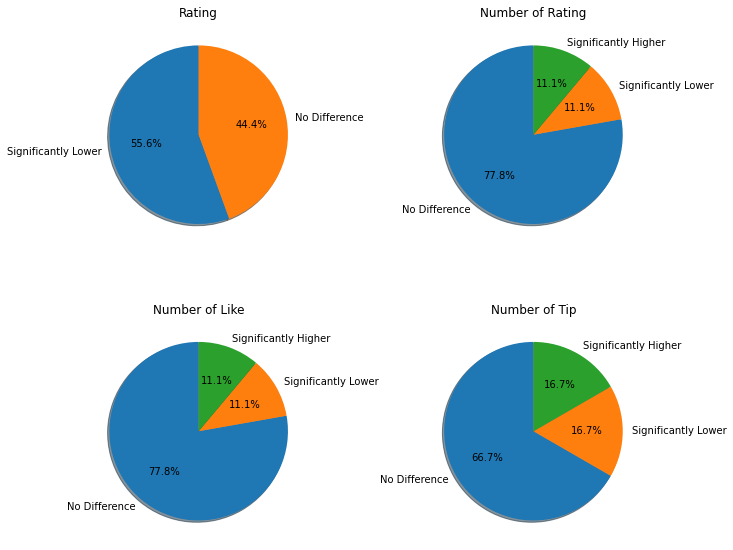

In [114]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
dataForPlot=dStarbucksCompAll["RatingCompare"].value_counts()
axs[0,0].pie(dataForPlot,  labels=dataForPlot.index, autopct='%1.1f%%', shadow=True, startangle=90)
axs[0,0].set_title('Rating')
dataForPlot=dStarbucksCompAll["RatingPopularityCompare"].value_counts()
axs[0,1].pie(dataForPlot,  labels=dataForPlot.index, autopct='%1.1f%%', shadow=True, startangle=90)
axs[0,1].set_title('Number of Rating')
dataForPlot=dStarbucksCompAll["LikePopularityCompare"].value_counts()
axs[1,0].pie(dataForPlot,  labels=dataForPlot.index, autopct='%1.1f%%', shadow=True, startangle=90)
axs[1,0].set_title('Number of Like')
dataForPlot=dStarbucksCompAll["TipPopularityCompare"].value_counts()
axs[1,1].pie(dataForPlot,  labels=dataForPlot.index, autopct='%1.1f%%', shadow=True, startangle=90)
axs[1,1].set_title('Number of Tip')

plt.subplots_adjust(wspace=0.5)
plt.show()


In [118]:
#overall evaluation
dStarbucksCompAll["OverallEvaluation"]="Same as other shops"
dStarbucksCompAll.loc[((dStarbucksCompAll["RatingCompare"]=="Significantly Lower") & ((dStarbucksCompAll["RatingPopularityCompare"]=="Significantly Higher") | (dStarbucksCompAll["LikePopularityCompare"]=="Significantly Higher") | (dStarbucksCompAll["TipPopularityCompare"]=="Significantly Higher"))),"OverallEvaluation"]="Lower Rating & Higher Popularity"
dStarbucksCompAll.loc[((dStarbucksCompAll["RatingCompare"]=="Significantly Lower") & ((dStarbucksCompAll["RatingPopularityCompare"]=="Significantly Lower") | (dStarbucksCompAll["LikePopularityCompare"]=="Significantly Lower") | (dStarbucksCompAll["TipPopularityCompare"]=="Significantly Lower"))),"OverallEvaluation"]="Lower Rating & Lower Popularity"
dStarbucksCompAll.loc[((dStarbucksCompAll["RatingCompare"]=="No Difference") & ((dStarbucksCompAll["RatingPopularityCompare"]=="Significantly Higher") | (dStarbucksCompAll["LikePopularityCompare"]=="Significantly Higher") | (dStarbucksCompAll["TipPopularityCompare"]=="Significantly Higher"))),"OverallEvaluation"]="Same Rating & Higher Popularity"
dStarbucksCompAll.loc[((dStarbucksCompAll["RatingCompare"]=="No Difference") & ((dStarbucksCompAll["RatingPopularityCompare"]=="Significantly Lower") | (dStarbucksCompAll["LikePopularityCompare"]=="Significantly Lower") | (dStarbucksCompAll["TipPopularityCompare"]=="Significantly Lower"))),"OverallEvaluation"]="Same Rating & Lower Popularity"


dataForPlot=dStarbucksCompAll["OverallEvaluation"].value_counts()
dataForPlot


Same as other shops                 12
Lower Rating & Higher Popularity     3
Lower Rating & Lower Popularity      2
Same Rating & Lower Popularity       1
Name: OverallEvaluation, dtype: int64

([<matplotlib.patches.Wedge at 0x7f51499259d0>,
 [Text(-0.95262790983307, -0.5500000594609754, 'Same as other shops'),
  Text(1.0999999999999892, 1.5448414929211732e-07, 'Lower Rating & Higher Popularity'),
  Text(0.7070662369728666, 0.8426489996036488, 'Lower Rating & Lower Popularity'),
  Text(0.1910128193489134, 1.0832885593618995, 'Same Rating & Lower Popularity')],
 [Text(-0.5196152235453109, -0.3000000324332593, '66.7%'),
  Text(0.5999999999999941, 8.426408143206398e-08, '16.7%'),
  Text(0.3856724928942909, 0.4596267270565357, '11.1%'),
  Text(0.10418881055395275, 0.5908846687428542, '5.6%')])

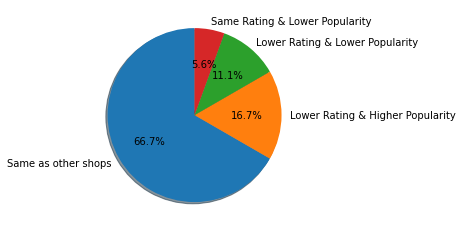

In [119]:
plt.pie(dataForPlot,labels=dataForPlot.index, autopct='%1.1f%%', shadow=True, startangle=90)